# Algorithms' convergence

*(Jupyter notebook by Simone Brugiapaglia)*

This notebook illustrates the notion of convergence through the use of visualization. For an overivew of visualization method in Python, see Chapter 12 of the book

*Q. Kong, T. Siauw, and A. M. Bayen. Python Programming and Numerical Methods: A Guide for Engineers and Scientists. Academic Press, 2021. (https://pythonnumericalmethods.berkeley.edu/)*

See also Section 1.3 of 

*Richard L. Burden, J. Douglas Faires and Annette M. Burden. Numerical Analysis (10th Edition). Cengage, 2016.*

In [5]:
import numpy as np
import matplotlib.pyplot as plt

## Convergence rates

Recall that a sequence $(\alpha_n)_{n=0}^\infty$ is said to converge to $\alpha$ with order of convergence $O(\beta_n)$ if 
$$
\lim_{n\to \infty} \alpha_n = \alpha,  \quad \lim_{n\to \infty} \beta_n = 0
$$
and if there exists a constant $K>0$ such that
$$
|\alpha_n - \alpha| \leq K \beta_n, \quad \text{for $n$ large enough.}
$$
A typical scenario is that of algebraic convergence rates 

### Example 1
Consider the sequence
$$
\alpha_n = 1 + \frac1n + \frac{1}{n^2}
$$
converging to $\alpha = 1$.

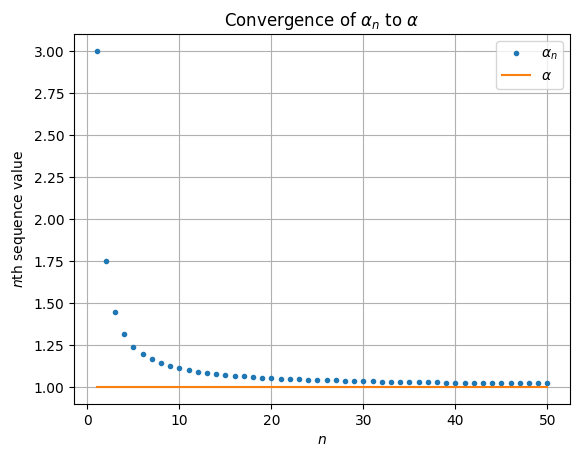

In [58]:
n = 1 + np.arange(50)      # n values
alpha_n = 1 + 1/n + 1/n**2 # alpha_n values
alpha = np.ones(n.shape)   # alpha values

# Visualize convergence of alpha_n to alpha
plt.plot(n, alpha_n, '.', label = "$α_n$")
plt.plot(n, alpha, '-', label = "$α$")
plt.xlabel('$n$')
plt.ylabel('$n$th sequence value')
plt.legend()
plt.grid()
plt.title('Convergence of $α_n$ to $α$')

plt.show()

Since $1/n^2 \leq 1/n$ for every $n \geq 1$, we have
$$
|\alpha_n - \alpha| = \frac1n + \frac{1}{n^2} \leq 2 \cdot \frac{1}{n}.
$$
Hence, $\alpha_n$ converges to $1$ with order of convergence $O(1/n)$ (just choose $K = 2$ and $\beta_n = 1/n$). Let's see what this means in terms of visualization.

Text(0.5, 1.0, 'Order of convergence')

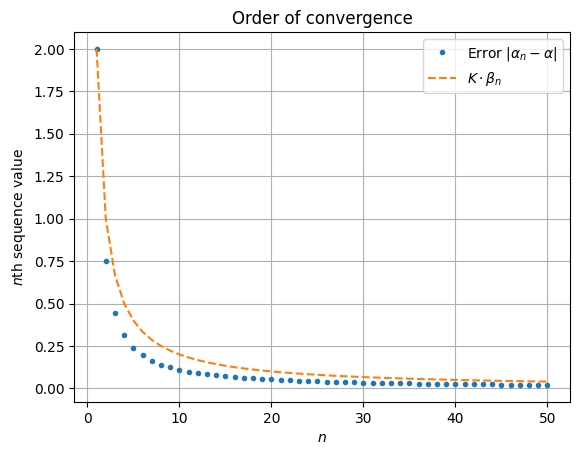

In [60]:
beta_n = 1/n
K = 2

# Visualize convergence of alpha_n to alpha
plt.plot(n, np.abs(alpha_n -  alpha), '.', label = "Error $|α_n - α|$")
plt.plot(n, K * beta_n, '--', label = "$K \cdot β_n$")
plt.xlabel('$n$')
plt.ylabel('$n$th sequence value')
plt.legend()
plt.grid()
plt.title('Order of convergence')

By using a *loglog plot*, the situation becomes extremely clear. A loglog plot is produced by plotting $x$- and $y$-coordinates in $\log_{10}$ scale. In the `matplotlib` module, this is implemented by the `plt.loglog()` function. It is also possible to consider a $\log_{10}$ transformation of the $x$-values or of the $y$-values only, using the command `plt.semilogx()` or `plt.semilogy()`

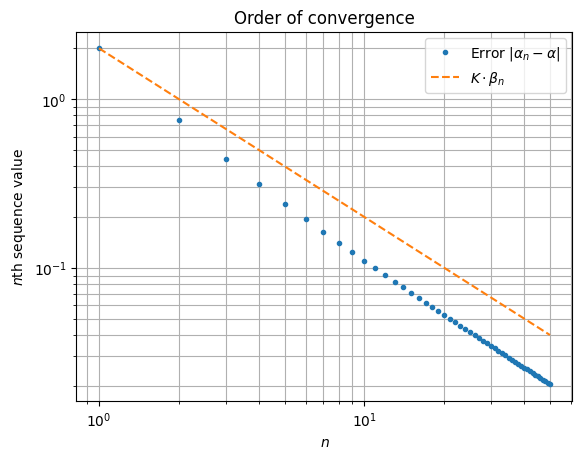

In [62]:
plt.loglog(n, np.abs(alpha_n -  alpha), '.', label = "Error $|α_n - α|$")
plt.loglog(n, K * beta_n, '--', label = "$K \cdot β_n$")
plt.xlabel('$n$')
plt.ylabel('$n$th sequence value')
plt.legend()
plt.grid(which = 'both')
plt.title('Order of convergence')

plt.show()

Remarkably, the error $|\alpha_n - \alpha|$ and the sequence $\beta_n = 1/n$ become parallel for largen values of $n$ in the loglog plot. This can be explained with the fact hat algebraic functions of the form 
$$
y = C \cdot x^{p},
$$
for some $C > 0$, after a $\log_{10}$ transformation of the $x$ and $y$ values, i.e. $X = \log_{10}(x)$ and $Y = \log_{10}(y)$, become linear:
$$
Y = \log_{10}(y) = \log_{10}(C \cdot x^{p}) = \log_{10}(C) +  p \log_{10}(x) = C' + p X.
$$
Note that the algebraic power $p$ in the $(x,y)$ plot becomes a slope in the transformed $(X,Y)$ plane. In particular, changing the value of the constant $C$ does not change the slope in the loglog plot. So, numerically, one could try to guess the order of convergence of a sequence by checking parallelism with different power laws in teh loglog plot.

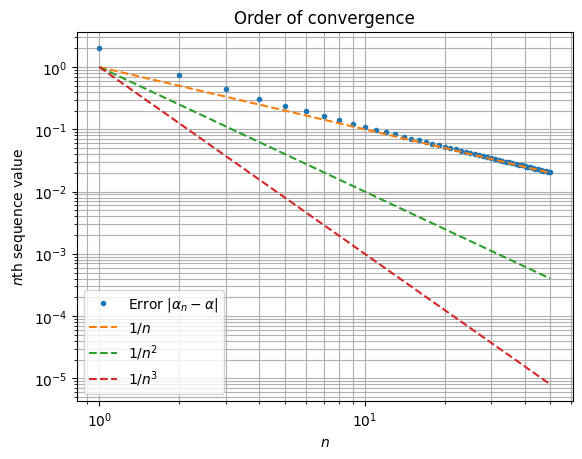

In [63]:
plt.loglog(n, np.abs(alpha_n -  alpha), '.', label = "Error $|α_n - α|$")
plt.loglog(n, 1/n, '--', label = "$1/n$")
plt.loglog(n, 1/n**2, '--', label = "$1/n^2$")
plt.loglog(n, 1/n**3, '--', label = "$1/n^3$")
plt.xlabel('$n$')
plt.ylabel('$n$th sequence value')
plt.legend()
plt.grid(which = 'both')
plt.title('Order of convergence')

plt.show()

As we can see, the error sequence is only parallel to the sequence $1/n$ and not, e.g., $1/n^2$ nor $1/n^3$.